In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248565 entries, 0 to 8248564
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [47]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
4,13204489,JG416325,09/06/2023 11:00:00 AM,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,4.0,32.0,06,1176857.0,1896680.0,2023,11/04/2023 03:40:18 PM,41.871835,-87.626151,"(41.871834768, -87.62615082)"


In [48]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.248565e+06,8.248565e+06,8.248518e+06,7.633736e+06,7.635110e+06,8.157202e+06,8.157202e+06,8.248565e+06,8.157202e+06,8.157202e+06
mean,7.382466e+06,1.184360e+03,1.129794e+01,2.277884e+01,3.740508e+01,1.164635e+06,1.885885e+06,2.010711e+03,4.184246e+01,-8.767137e+01
std,3.705652e+06,7.036055e+02,6.961123e+00,1.385684e+01,2.154724e+01,1.696572e+04,3.245131e+04,6.847099e+00,8.928543e-02,6.147531e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.983398e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153043e+06,1.859182e+06,2.005000e+03,4.176889e+01,-8.771346e+01
50%,7.382201e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166181e+06,1.890942e+06,2.010000e+03,4.185633e+01,-8.766567e+01
75%,1.070787e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176391e+06,1.909397e+06,2.016000e+03,4.190706e+01,-8.762810e+01
max,1.373568e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.025000e+03,4.202291e+01,-8.752453e+01


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df['Time'] = df['Date'].dt.time   
df['Date'] = df['Date'].dt.date   

In [ ]:
column_order = ['ID', 'Case Number', 'Date', 'Time'] + [col for col in df.columns if col not in ['ID', 'Case Number', 'Date', 'Time']]
df = df[column_order]

In [ ]:
df.head(5)

,ID,Case Number,Date,Time,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,2022-07-29,03:39:00,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,2023-01-03,16:44:00,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,11227634,JB147599,2017-08-26,10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,13203321,JG415333,2023-09-06,17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
4,13204489,JG416325,2023-09-06,11:00:00,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,4.0,32.0,06,1176857.0,1896680.0,2023,11/04/2023 03:40:18 PM,41.871835,-87.626151,"(41.871834768, -87.62615082)"


In [53]:
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

/var/folders/5k/cvv4w5kd3k5b270l996t_6gc0000gn/T/ipykernel_20449/3864921456.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')


In [54]:
df['Updated_Date'] = df['Updated On'].dt.date
df['Updated_Time'] = df['Updated On'].dt.time

In [55]:
col_index = df.columns.get_loc('Updated On')
df.drop(columns=['Updated On'], inplace=True)

In [56]:
cols = df.columns.tolist()
cols.insert(col_index, 'Updated_Time')
cols.insert(col_index, 'Updated_Date')

df = df[cols]

In [57]:
df.head(10)

,ID,Case Number,Date,Time,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated_Date,Updated_Time,Latitude,Longitude,Location,Updated_Date,Updated_Time
0,13311263,JG503434,2022-07-29,03:39:00,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,...,NaN,NaN,2022,2024-04-18,15:40:59,NaN,NaN,NaN,2024-04-18,15:40:59
1,13053066,JG103252,2023-01-03,16:44:00,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,...,NaN,NaN,2023,2024-01-20,15:41:12,NaN,NaN,NaN,2024-01-20,15:41:12
2,11227634,JB147599,2017-08-26,10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,...,NaN,NaN,2017,2018-02-11,15:57:41,NaN,NaN,NaN,2018-02-11,15:57:41
3,13203321,JG415333,2023-09-06,17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,1174694.0,1901831.0,2023,2023-11-04,15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)",2023-11-04,15:40:18
4,13204489,JG416325,2023-09-06,11:00:00,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,1176857.0,1896680.0,2023,2023-11-04,15:40:18,41.871835,-87.626151,"(41.871834768, -87.62615082)",2023-11-04,15:40:18
5,11695116,JC272771,2019-05-21,08:20:00,018XX S CALIFORNIA AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,...,1157982.0,1890961.0,2019,2024-01-19,15:40:50,41.856547,-87.695605,"(41.856547057, -87.695604526)",2024-01-19,15:40:50
6,12419690,JE295655,2021-07-07,10:30:00,132XX S GREENWOOD AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,...,1186051.0,1817781.0,2021,2024-01-19,15:40:50,41.655116,-87.594883,"(41.65511579, -87.594883198)",2024-01-19,15:40:50
7,12729745,JF279458,2022-06-14,14:47:00,035XX N CENTRAL AVE,0340,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,BANK,True,...,1138391.0,1923142.0,2022,2024-01-19,15:40:50,41.945232,-87.766735,"(41.945232412, -87.766734668)",2024-01-19,15:40:50
8,12835559,JF406130,2022-09-21,22:00:00,004XX E 69TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),True,...,1180204.0,1859359.0,2022,2024-01-19,15:40:50,41.769347,-87.615008,"(41.769346711, -87.615008288)",2024-01-19,15:40:50
9,13003649,JG177593,2023-02-22,13:50:00,070XX S CLYDE AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - PORCH / HALLWAY,True,...,1191427.0,1858753.0,2023,2024-01-19,15:40:50,41.767419,-87.573890,"(41.767419224, -87.573890196)",2024-01-19,15:40:50


In [58]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Time                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated_Date             object
Updated_Time             object
Latitude                float64
Longitude               float64
Location                 object
Updated_Date             object
Updated_Time             object
dtype: object

In [59]:
df.shape

(8248565, 26)

In [60]:
max_year = df['Date'].max()
min_year = df['Date'].min()
print(f"Latest Year: {max_year}")
print(f"Earliest Year: {min_year}")

Latest Year: 2025-01-24
Earliest Year: 2001-01-01


In [61]:
df = df[df['Date'] < pd.to_datetime('2025-01-01').date()]

In [62]:
max_year = df['Date'].max()
min_year = df['Date'].min()
print(f"Latest Year: {max_year}")
print(f"Earliest Year: {min_year}")

Latest Year: 2024-12-31
Earliest Year: 2001-01-01


In [63]:
df.head(10)

,ID,Case Number,Date,Time,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated_Date,Updated_Time,Latitude,Longitude,Location,Updated_Date,Updated_Time
0,13311263,JG503434,2022-07-29,03:39:00,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,...,NaN,NaN,2022,2024-04-18,15:40:59,NaN,NaN,NaN,2024-04-18,15:40:59
1,13053066,JG103252,2023-01-03,16:44:00,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,...,NaN,NaN,2023,2024-01-20,15:41:12,NaN,NaN,NaN,2024-01-20,15:41:12
2,11227634,JB147599,2017-08-26,10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,...,NaN,NaN,2017,2018-02-11,15:57:41,NaN,NaN,NaN,2018-02-11,15:57:41
3,13203321,JG415333,2023-09-06,17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,1174694.0,1901831.0,2023,2023-11-04,15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)",2023-11-04,15:40:18
4,13204489,JG416325,2023-09-06,11:00:00,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,1176857.0,1896680.0,2023,2023-11-04,15:40:18,41.871835,-87.626151,"(41.871834768, -87.62615082)",2023-11-04,15:40:18
5,11695116,JC272771,2019-05-21,08:20:00,018XX S CALIFORNIA AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,...,1157982.0,1890961.0,2019,2024-01-19,15:40:50,41.856547,-87.695605,"(41.856547057, -87.695604526)",2024-01-19,15:40:50
6,12419690,JE295655,2021-07-07,10:30:00,132XX S GREENWOOD AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,...,1186051.0,1817781.0,2021,2024-01-19,15:40:50,41.655116,-87.594883,"(41.65511579, -87.594883198)",2024-01-19,15:40:50
7,12729745,JF279458,2022-06-14,14:47:00,035XX N CENTRAL AVE,0340,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,BANK,True,...,1138391.0,1923142.0,2022,2024-01-19,15:40:50,41.945232,-87.766735,"(41.945232412, -87.766734668)",2024-01-19,15:40:50
8,12835559,JF406130,2022-09-21,22:00:00,004XX E 69TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),True,...,1180204.0,1859359.0,2022,2024-01-19,15:40:50,41.769347,-87.615008,"(41.769346711, -87.615008288)",2024-01-19,15:40:50
9,13003649,JG177593,2023-02-22,13:50:00,070XX S CLYDE AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - PORCH / HALLWAY,True,...,1191427.0,1858753.0,2023,2024-01-19,15:40:50,41.767419,-87.573890,"(41.767419224, -87.573890196)",2024-01-19,15:40:50


In [64]:
df.shape

(8235756, 26)

In [65]:
x = df.isnull().sum()
x = x[x > 0]
print("Missing Values in Dataset:\n", x)

Missing Values in Dataset:
 Location Description     13894
District                    47
Ward                    614829
Community Area          613455
X Coordinate             91297
Y Coordinate             91297
Latitude                 91297
Longitude                91297
Location                 91297
dtype: int64


In [66]:
drop_col = ['ID', 'Case Number', 'IUCR', 'Updated_Date', 'Updated_Time', 
             'X Coordinate', 'Y Coordinate', 'Location']
df.drop(columns=drop_col, inplace=True)

In [67]:
df.head(10)

,Date,Time,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
0,2022-07-29,03:39:00,023XX S TROY ST,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,1033,10.0,25.0,30.0,17,2022,NaN,NaN
1,2023-01-03,16:44:00,039XX W WASHINGTON BLVD,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,1122,11.0,28.0,26.0,18,2023,NaN,NaN
2,2017-08-26,10:00:00,001XX W RANDOLPH ST,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,2017,NaN,NaN
3,2023-09-06,17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,42.0,32.0,14,2023,41.886018,-87.633938
4,2023-09-06,11:00:00,0000X E 8TH ST,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,123,1.0,4.0,32.0,06,2023,41.871835,-87.626151
5,2019-05-21,08:20:00,018XX S CALIFORNIA AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,1023,10.0,25.0,29.0,05,2019,41.856547,-87.695605
6,2021-07-07,10:30:00,132XX S GREENWOOD AVE,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,533,5.0,10.0,54.0,17,2021,41.655116,-87.594883
7,2022-06-14,14:47:00,035XX N CENTRAL AVE,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,BANK,True,False,1633,16.0,30.0,15.0,03,2022,41.945232,-87.766735
8,2022-09-21,22:00:00,004XX E 69TH ST,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),True,False,322,3.0,6.0,69.0,07,2022,41.769347,-87.615008
9,2023-02-22,13:50:00,070XX S CLYDE AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE - PORCH / HALLWAY,True,False,331,3.0,5.0,43.0,05,2023,41.767419,-87.573890


In [68]:
x = df.isnull().sum()
x = x[x > 0]
print("Missing Values in Dataset:\n", x)

Missing Values in Dataset:
 Location Description     13894
District                    47
Ward                    614829
Community Area          613455
Latitude                 91297
Longitude                91297
dtype: int64


In [69]:
df['Location Description'].fillna('UNKNOWN', inplace=True)

/var/folders/5k/cvv4w5kd3k5b270l996t_6gc0000gn/T/ipykernel_20449/1229729722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location Description'].fillna('UNKNOWN', inplace=True)


In [70]:
df = df.dropna(subset=['District'])

In [71]:
df.drop(columns=['Ward'], inplace=True)

In [72]:
df['Community Area'].fillna(-1, inplace=True)

/var/folders/5k/cvv4w5kd3k5b270l996t_6gc0000gn/T/ipykernel_20449/3674736175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Community Area'].fillna(-1, inplace=True)


In [73]:
df = df.dropna(subset=['Latitude', 'Longitude'])

In [74]:
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 Date                    0
Time                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
dtype: int64


In [75]:
df.shape

(8144412, 15)

In [76]:
df.head(10)

,Date,Time,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,FBI Code,Year,Latitude,Longitude
3,2023-09-06,17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,32.0,14,2023,41.886018,-87.633938
4,2023-09-06,11:00:00,0000X E 8TH ST,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,123,1.0,32.0,06,2023,41.871835,-87.626151
5,2019-05-21,08:20:00,018XX S CALIFORNIA AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,1023,10.0,29.0,05,2019,41.856547,-87.695605
6,2021-07-07,10:30:00,132XX S GREENWOOD AVE,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,533,5.0,54.0,17,2021,41.655116,-87.594883
7,2022-06-14,14:47:00,035XX N CENTRAL AVE,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,BANK,True,False,1633,16.0,15.0,03,2022,41.945232,-87.766735
8,2022-09-21,22:00:00,004XX E 69TH ST,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),True,False,322,3.0,69.0,07,2022,41.769347,-87.615008
9,2023-02-22,13:50:00,070XX S CLYDE AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE - PORCH / HALLWAY,True,False,331,3.0,43.0,05,2023,41.767419,-87.573890
10,2023-05-03,08:10:00,073XX S EMERALD AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,True,732,7.0,68.0,08B,2023,41.760943,-87.643083
11,2022-12-25,00:01:00,055XX S ALBANY AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE - GARAGE,False,True,824,8.0,63.0,08B,2022,41.792606,-87.701090
12,2023-03-13,18:40:00,004XX E 88TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,632,6.0,44.0,01A,2023,41.734697,-87.613182


In [77]:
df.dtypes

Date                     object
Time                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Community Area          float64
FBI Code                 object
Year                      int64
Latitude                float64
Longitude               float64
dtype: object

In [78]:
cat_cols = ['Primary Type', 'Description', 'Location Description', 'FBI Code']
for col in cat_cols:
    df[col] = df[col].astype('category')


int_cols = ['District', 'Community Area']
for col in int_cols:
    df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')

print(df.dtypes)

Date                      object
Time                      object
Block                     object
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                    int8
Community Area              int8
FBI Code                category
Year                       int64
Latitude                 float64
Longitude                float64
dtype: object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

In [93]:
df.head(10)

,Date,Time,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,FBI Code,Year,Latitude,Longitude,Month,DayOfWeek,Hour
3,2023-09-06,17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1,32,14,2023,41.886018,-87.633938,9,Wednesday,17
4,2023-09-06,11:00:00,0000X E 8TH ST,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,123,1,32,06,2023,41.871835,-87.626151,9,Wednesday,11
5,2019-05-21,08:20:00,018XX S CALIFORNIA AVE,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,1023,10,29,05,2019,41.856547,-87.695605,5,Tuesday,8
6,2021-07-07,10:30:00,132XX S GREENWOOD AVE,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,533,5,54,17,2021,41.655116,-87.594883,7,Wednesday,10
7,2022-06-14,14:47:00,035XX N CENTRAL AVE,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,BANK,True,False,1633,16,15,03,2022,41.945232,-87.766735,6,Tuesday,14
8,2022-09-21,22:00:00,004XX E 69TH ST,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),True,False,322,3,69,07,2022,41.769347,-87.615008,9,Wednesday,22
9,2023-02-22,13:50:00,070XX S CLYDE AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE - PORCH / HALLWAY,True,False,331,3,43,05,2023,41.767419,-87.573890,2,Wednesday,13
10,2023-05-03,08:10:00,073XX S EMERALD AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,True,732,7,68,08B,2023,41.760943,-87.643083,5,Wednesday,8
11,2022-12-25,00:01:00,055XX S ALBANY AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE - GARAGE,False,True,824,8,63,08B,2022,41.792606,-87.701090,12,Sunday,0
12,2023-03-13,18:40:00,004XX E 88TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,632,6,44,01A,2023,41.734697,-87.613182,3,Monday,18


In [95]:
crimes_per_year = df['Year'].value_counts().sort_index()
crimes_per_year

Year
2001    482879
2002    471531
2003    472042
2004    467211
2005    449929
2006    445564
2007    435706
2008    419858
2009    385965
2010    369984
2011    351305
2012    335474
2013    306419
2014    273779
2015    257938
2016    267271
2017    264968
2018    263557
2019    259173
2020    207965
2021    202870
2022    234887
2023    261255
2024    256882
Name: count, dtype: int64

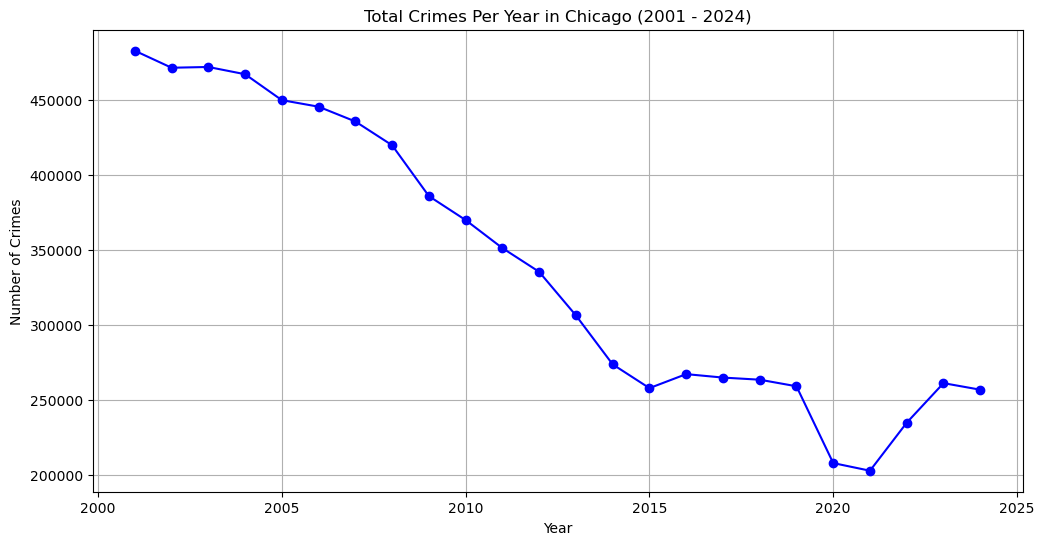

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_year.index, crimes_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Total Crimes Per Year in Chicago (2001 - 2024)")
plt.grid(True)
plt.show()

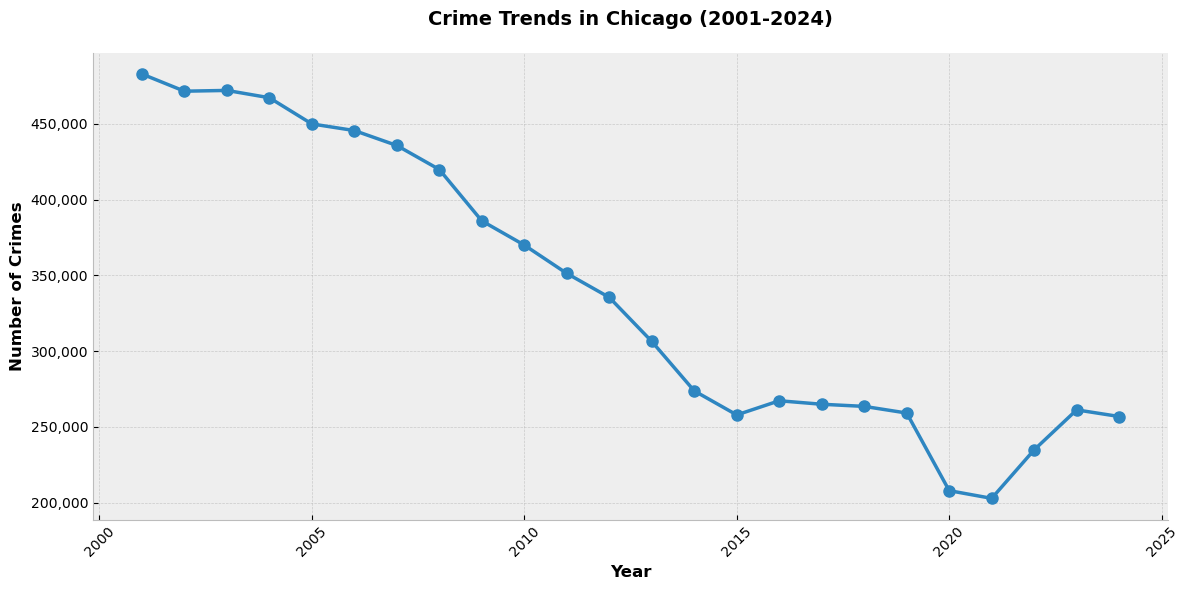

In [ ]:
plt.style.use('bmh')  

plt.figure(figsize=(12, 6))
plt.plot(crimes_per_year.index, crimes_per_year.values, 
         marker='o', 
         linestyle='-', 
         color='#2E86C1', 
         linewidth=2.5,
         markersize=8)


plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Crimes", fontsize=12, fontweight='bold')
plt.title("Crime Trends in Chicago (2001-2024)", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}"))

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

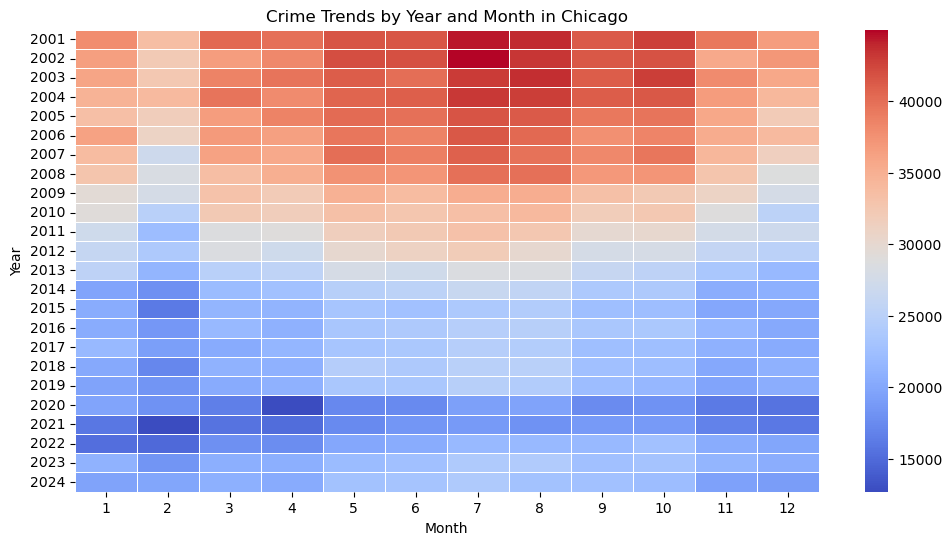

In [ ]:
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month

crimes_per_month = df.groupby(['Year', 'Month']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(crimes_per_month, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Crime Trends by Year and Month in Chicago")
plt.show()

/var/folders/5k/cvv4w5kd3k5b270l996t_6gc0000gn/T/ipykernel_20449/1687249701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_by_day.index, y=crime_by_day.values, palette="viridis")


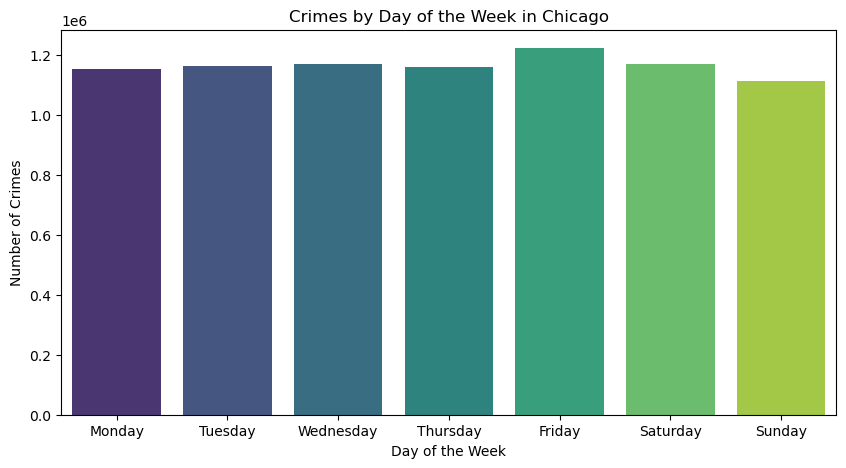

In [ ]:
df['DayOfWeek'] = pd.to_datetime(df['Date'], errors='coerce').dt.day_name()

crime_by_day = df['DayOfWeek'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(10, 5))
sns.barplot(x=crime_by_day.index, y=crime_by_day.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Day of the Week in Chicago")
plt.show()

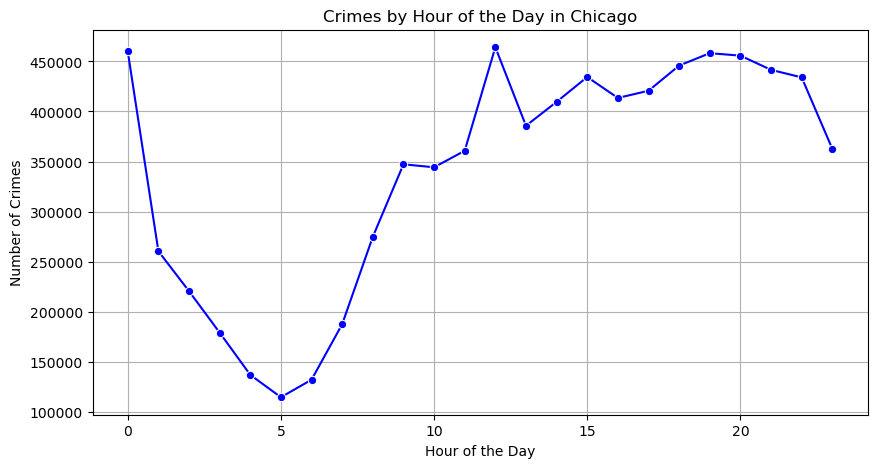

In [ ]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

crime_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=crime_by_hour.index, y=crime_by_hour.values, marker="o", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Hour of the Day in Chicago")
plt.grid(True)
plt.show()

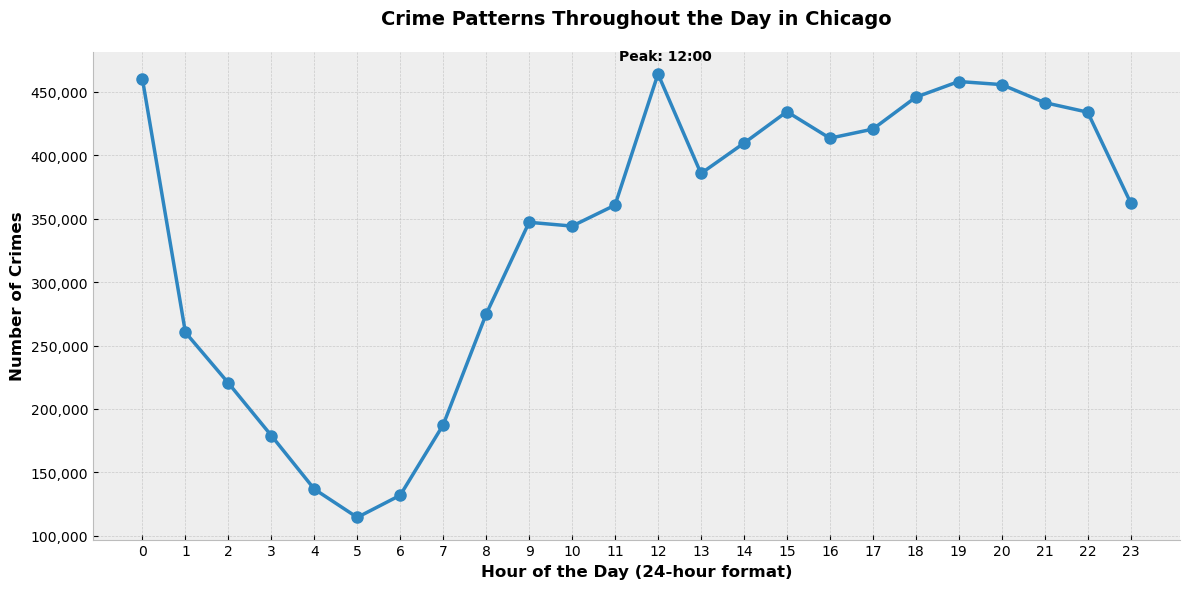

In [ ]:
plt.style.use('bmh') 

plt.figure(figsize=(12, 6))
plt.plot(crime_by_hour.index, crime_by_hour.values,
         marker='o',
         linestyle='-',
         color='#2E86C1',  
         linewidth=2.5,
         markersize=8)

plt.xlabel("Hour of the Day (24-hour format)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Crimes", fontsize=12, fontweight='bold')
plt.title("Crime Patterns Throughout the Day in Chicago", 
          fontsize=14, 
          fontweight='bold',
          pad=20)

plt.xticks(range(0, 24), rotation=0)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}"))

# Add annotations for peak times
max_hour = crime_by_hour.idxmax()
max_value = crime_by_hour.max()
plt.annotate(f'Peak: {max_hour:02d}:00',
             xy=(max_hour, max_value),
             xytext=(5, 10),
             textcoords='offset points',
             ha='center',
             fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

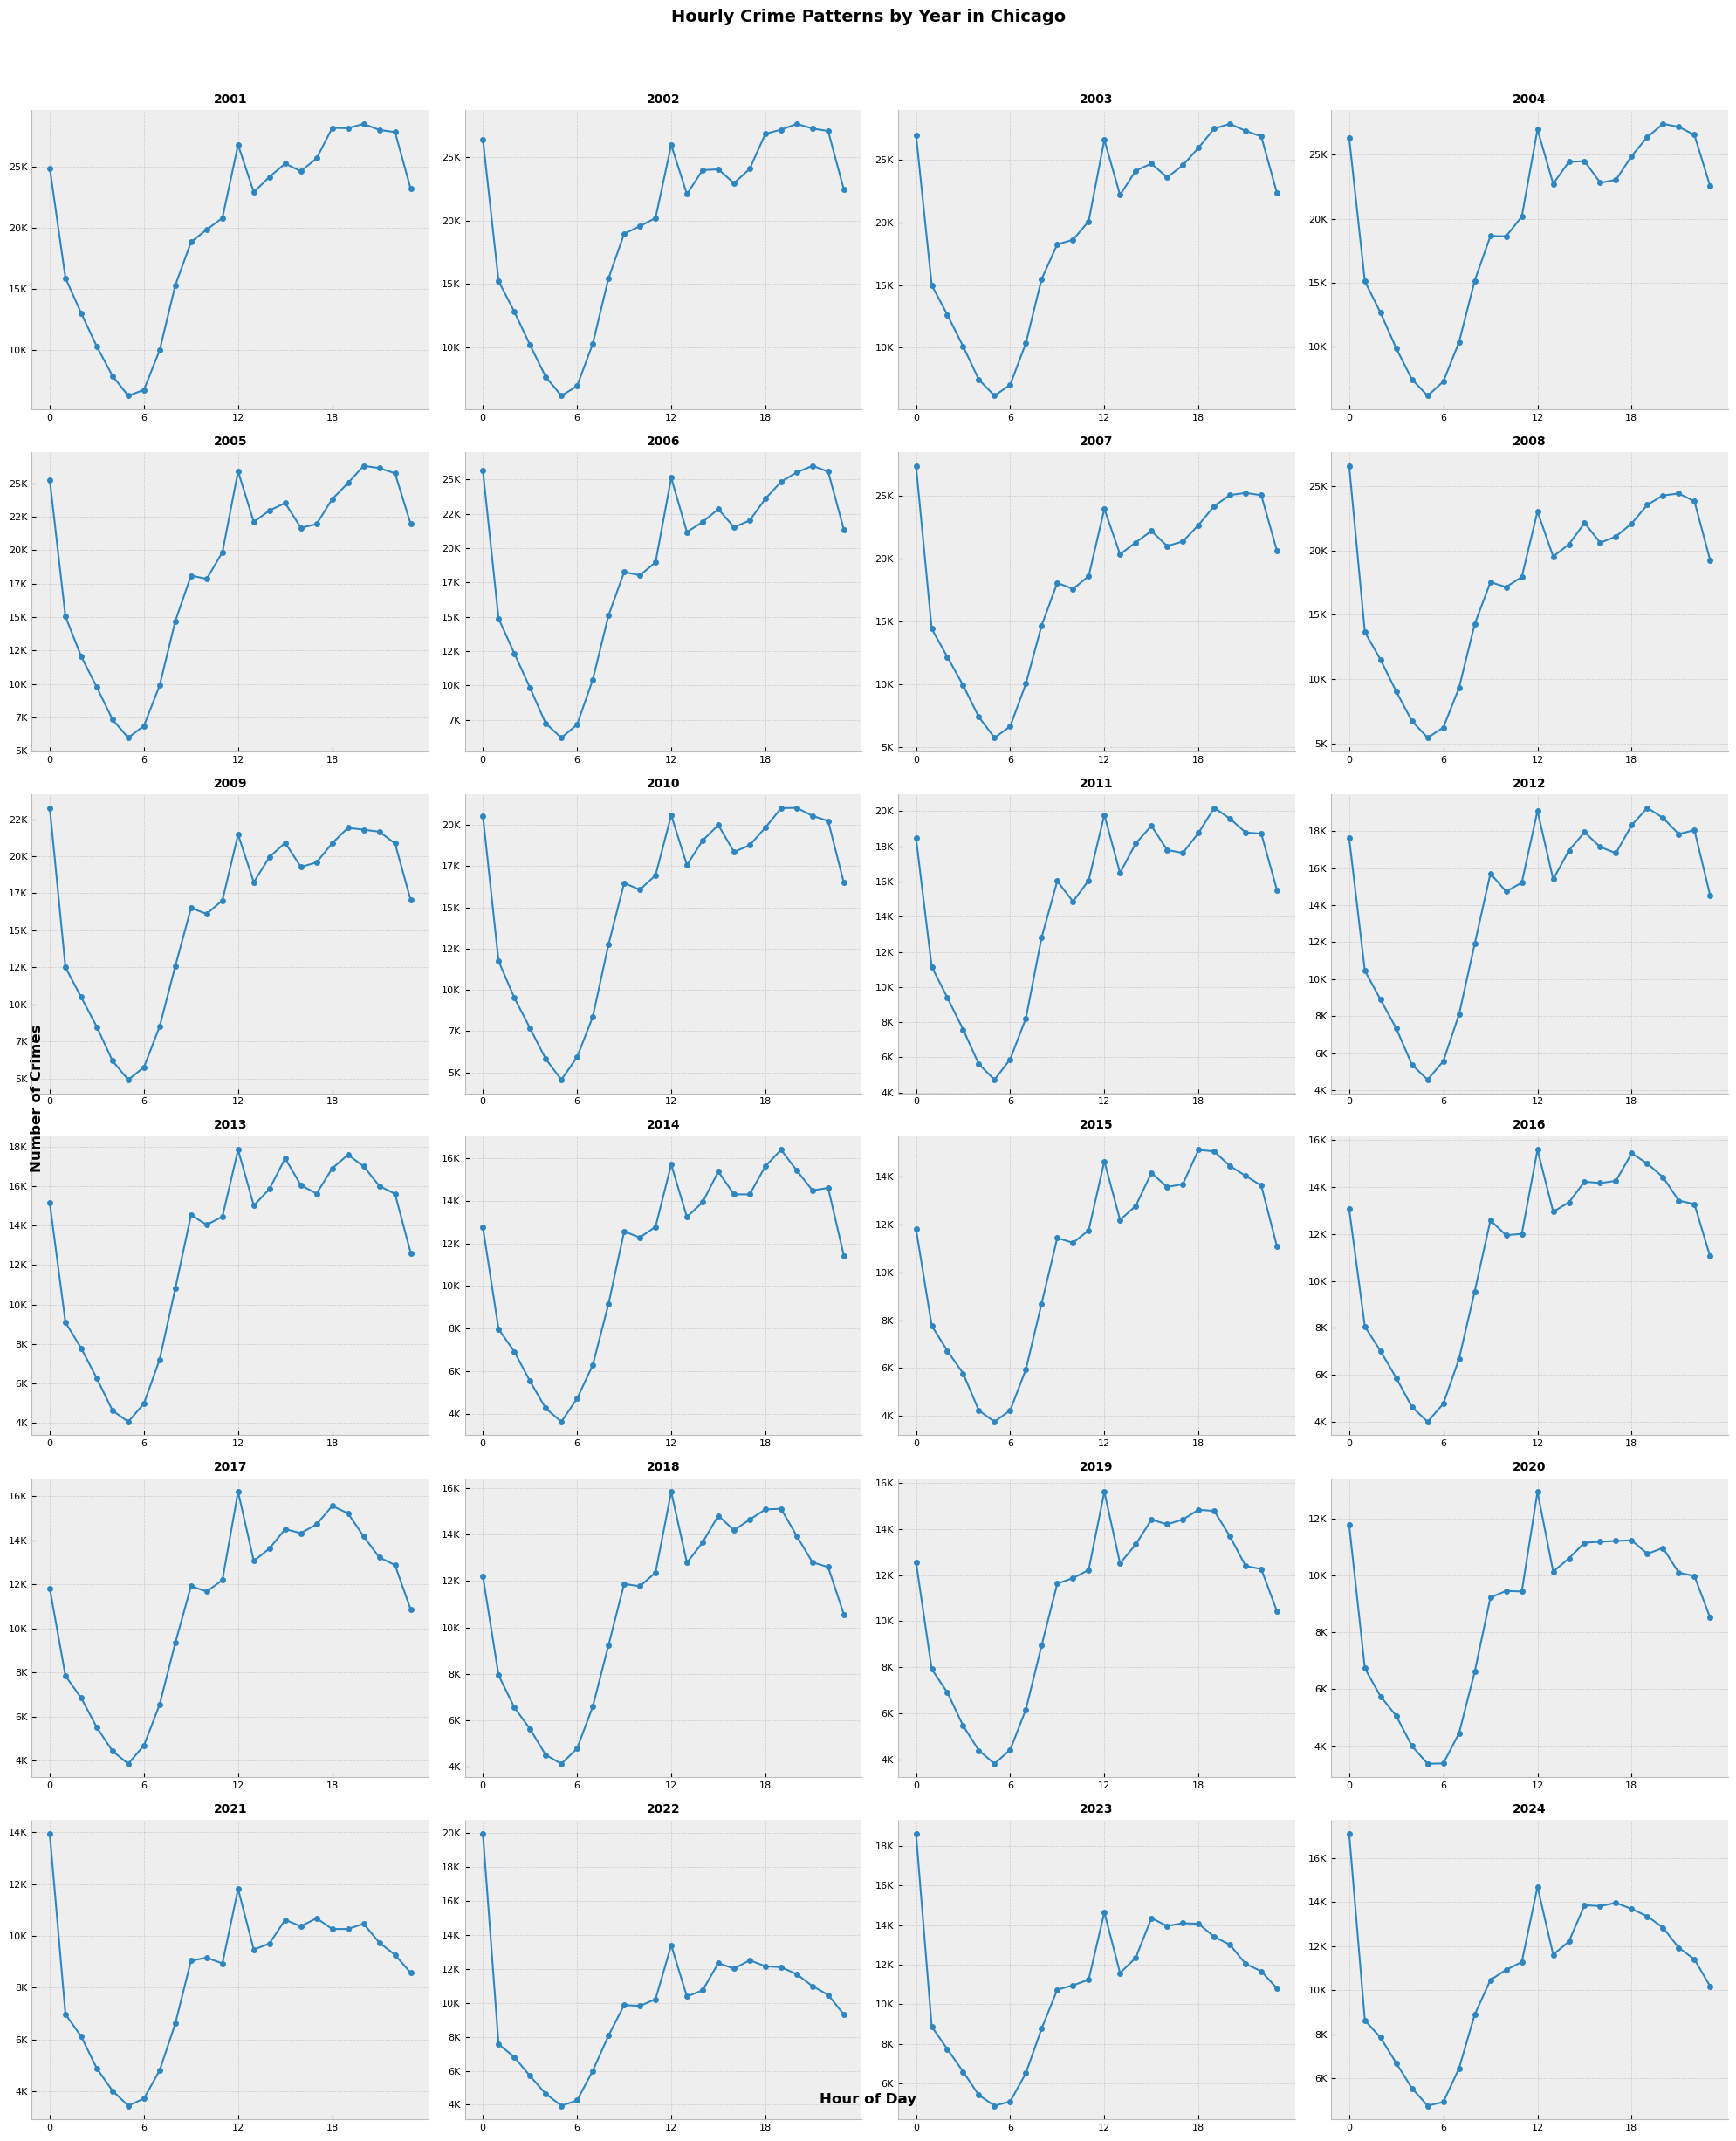

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

years = sorted(df['Year'].unique())
n_years = len(years)
n_cols = 4
n_rows = (n_years + n_cols - 1) // n_cols

plt.style.use('bmh')
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for idx, year in enumerate(years):
    year_data = df[df['Year'] == year].groupby('Hour').size()
    
    ax = axes[idx]
    ax.plot(year_data.index, year_data.values,
            marker='o',
            linestyle='-',
            color='#2E86C1',
            linewidth=1.5,
            markersize=4)

    ax.set_title(f'{year}', fontsize=10, fontweight='bold')
    ax.set_xticks(range(0, 24, 6))
    ax.tick_params(axis='both', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x/1000)}K"))

    ax.grid(True, linestyle='--', alpha=0.6)

for idx in range(len(years), len(axes)):
    fig.delaxes(axes[idx])

fig.text(0.5, 0.02, 'Hour of Day', ha='center', fontsize=12, fontweight='bold')
fig.text(0.02, 0.5, 'Number of Crimes', va='center', rotation='vertical', fontsize=12, fontweight='bold')
fig.suptitle('Hourly Crime Patterns by Year in Chicago', fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

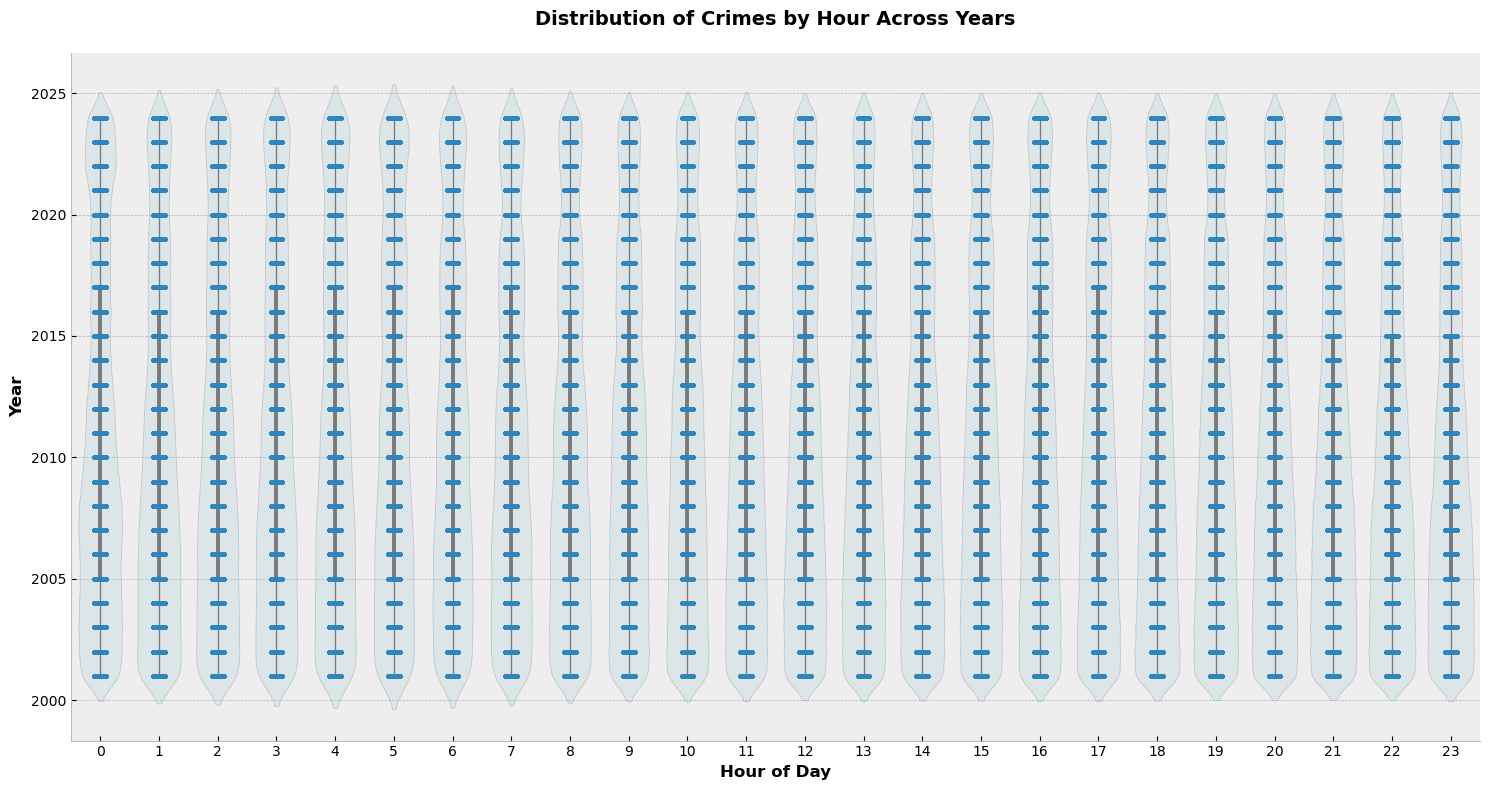

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.style.use('bmh')

sns.violinplot(data=df, x='Hour', y='Year', color='lightblue', alpha=0.3)
sns.stripplot(data=df, x='Hour', y='Year', color='#2E86C1', alpha=0.4, size=3)

plt.title('Distribution of Crimes by Hour Across Years', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12, fontweight='bold')
plt.ylabel('Year', fontsize=12, fontweight='bold')

plt.xticks(range(0, 24))
plt.tick_params(axis='both', labelsize=10)

sns.despine()

plt.tight_layout()
plt.show()

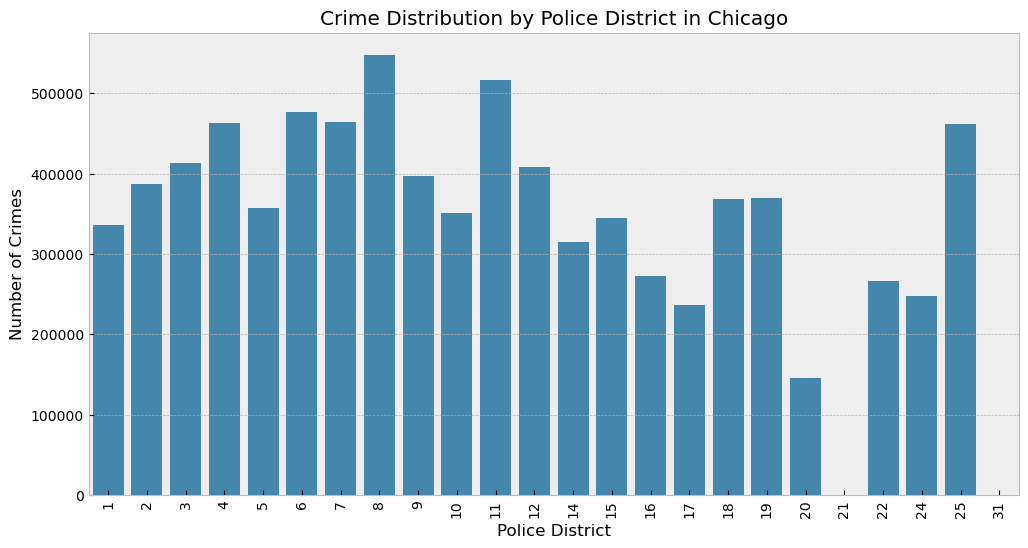

In [ ]:
district_crime_counts = df['District'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=district_crime_counts.index, y=district_crime_counts.values)
plt.xlabel("Police District")
plt.ylabel("Number of Crimes")
plt.title("Crime Distribution by Police District in Chicago")
plt.xticks(rotation=90)
plt.show()

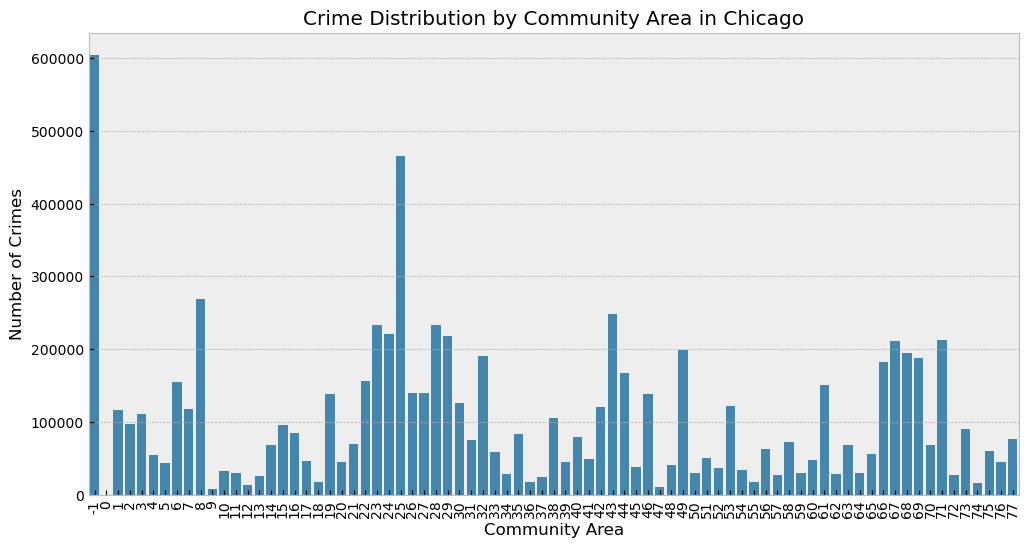

In [ ]:
community_crime_counts = df['Community Area'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=community_crime_counts.index, y=community_crime_counts.values)
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.title("Crime Distribution by Community Area in Chicago")
plt.xticks(rotation=90)
plt.show()

In [105]:
total_arrests = df['Arrest'].sum()
print(f"Total Arrests in the Dataset: {total_arrests:,}")

Total Arrests in the Dataset: 2,073,933


In [107]:
arrests_per_year = df[df['Arrest'] == True].groupby('Year').size()
arrests_per_year

Year
2001    141207
2002    136670
2003    140472
2004    144276
2005    140253
2006    134699
2007    131721
2008    108173
2009    108864
2010    100488
2011     96213
2012     90581
2013     86469
2014     79314
2015     67522
2016     52857
2017     52283
2018     52952
2019     56113
2020     33815
2021     25132
2022     27303
2023     31631
2024     34925
dtype: int64

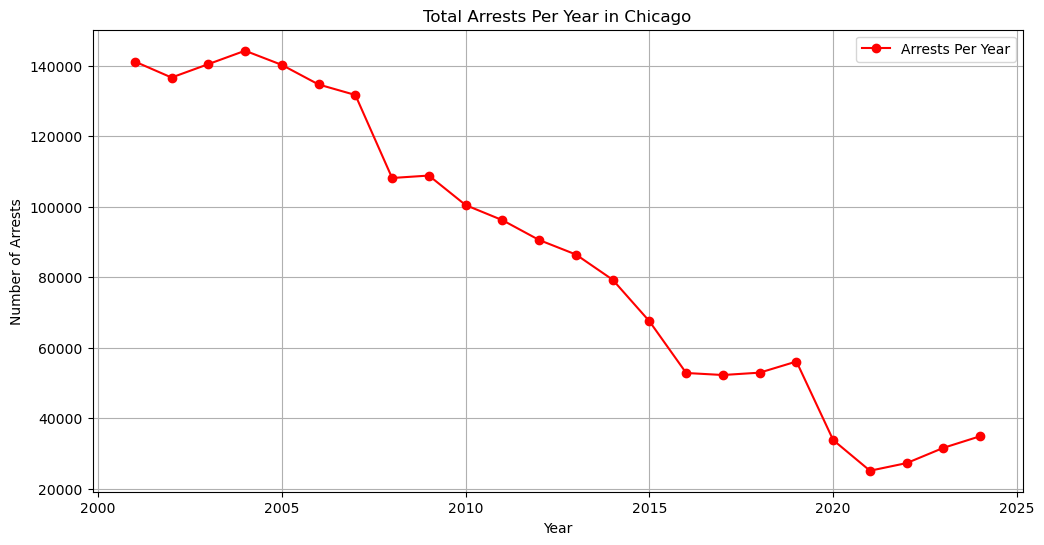

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color='r', label="Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Total Arrests Per Year in Chicago")
plt.legend()
plt.grid(True)
plt.show()

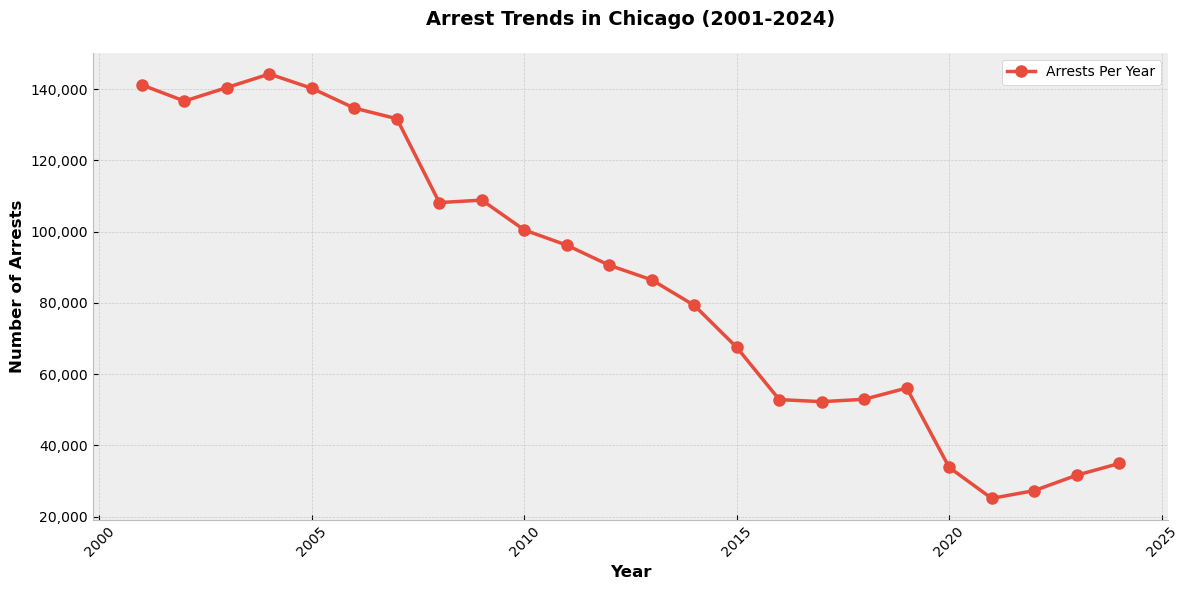

In [ ]:
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, 
         marker='o', 
         linestyle='-', 
         color='#E74C3C', 
         linewidth=2.5,
         markersize=8,
         label="Arrests Per Year")

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Arrests", fontsize=12, fontweight='bold')
plt.title("Arrest Trends in Chicago (2001-2024)", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}"))

plt.legend(fontsize=10, frameon=True, facecolor='white', framealpha=1)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

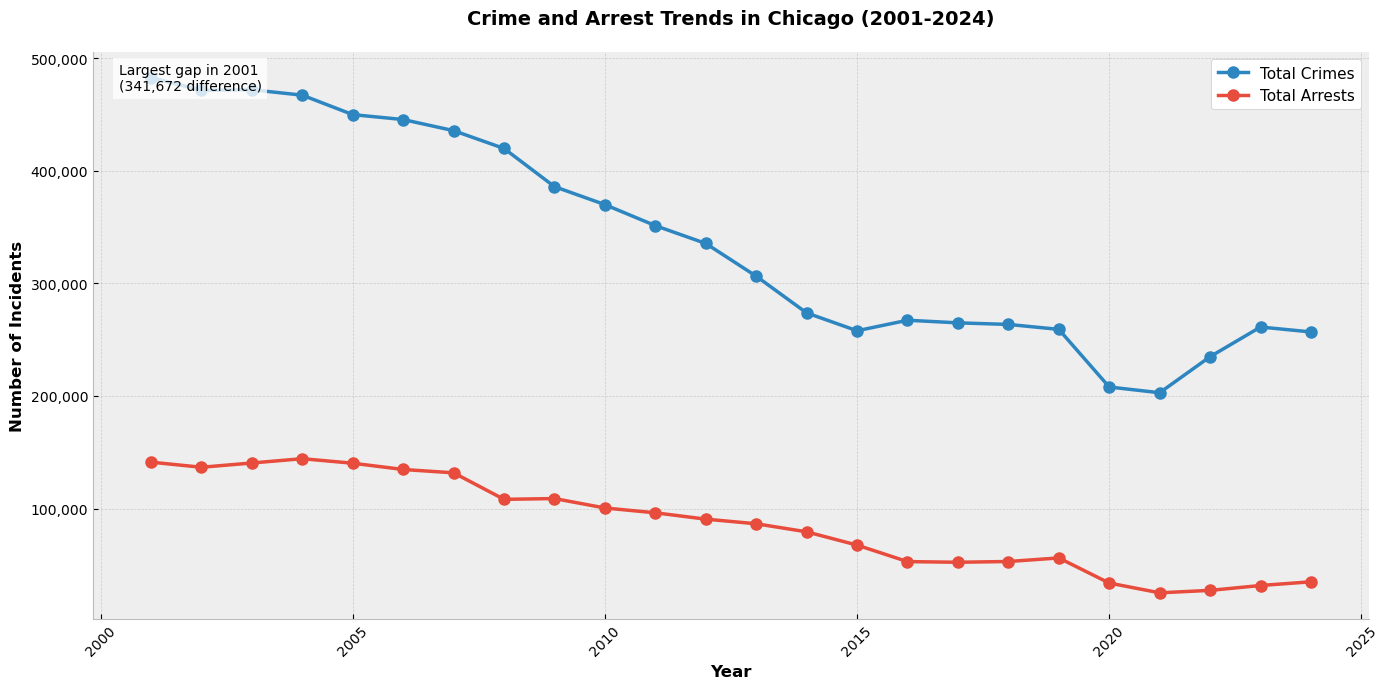

In [ ]:
plt.style.use('bmh')

plt.figure(figsize=(14, 7))

plt.plot(crimes_per_year.index, crimes_per_year.values, 
         marker='o', 
         linestyle='-', 
         color='#2E86C1',  
         linewidth=2.5,
         markersize=8,
         label="Total Crimes")

plt.plot(arrests_per_year.index, arrests_per_year.values, 
         marker='o', 
         linestyle='-', 
         color='#E74C3C', 
         linewidth=2.5,
         markersize=8,
         label="Total Arrests")

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Incidents", fontsize=12, fontweight='bold')
plt.title("Crime and Arrest Trends in Chicago (2001-2024)", 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{int(x):,}"))

plt.legend(fontsize=11, 
          frameon=True, 
          facecolor='white', 
          framealpha=1, 
          loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45)

plt.tight_layout()

max_year_diff = (crimes_per_year - arrests_per_year).idxmax()
max_diff = (crimes_per_year - arrests_per_year).max()
plt.text(0.02, 0.98, 
         f'Largest gap in {max_year_diff}\n({max_diff:,.0f} difference)',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         verticalalignment='top',
         fontsize=10)

plt.show()

In [ ]:
crime_arrest_counts = df[df['Arrest'] == True]['Primary Type'].value_counts()
crime_total_counts = df['Primary Type'].value_counts()
crime_arrest_rate = (crime_arrest_counts / crime_total_counts).sort_values(ascending=False)

In [114]:
top_10_most_arrested = crime_arrest_rate.head(10)
top_10_least_arrested = crime_arrest_rate.tail(10)

/var/folders/5k/cvv4w5kd3k5b270l996t_6gc0000gn/T/ipykernel_20449/2960595748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_most_arrested.index, x=top_10_most_arrested.values * 100, palette="Reds", order=top_10_most_arrested.index)


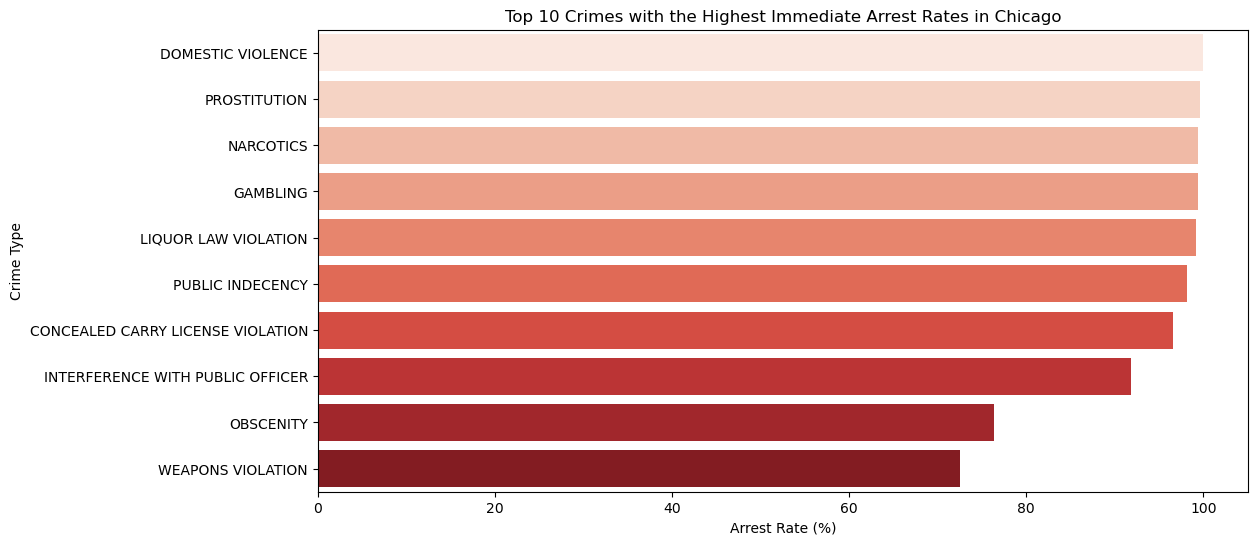

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_most_arrested.index, x=top_10_most_arrested.values * 100, palette="Reds", order=top_10_most_arrested.index)
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Crime Type")
plt.title("Top 10 Crimes with the Highest Immediate Arrest Rates in Chicago")
plt.show()

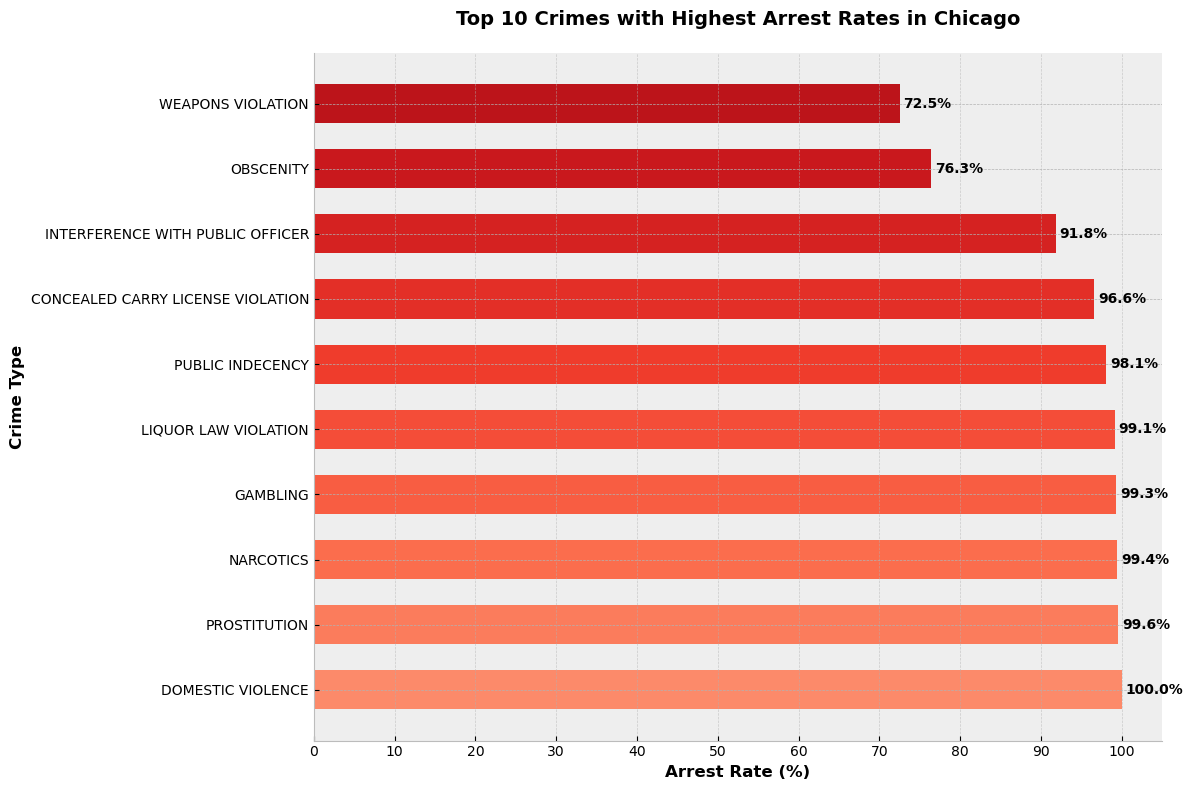

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(12, 8))

bars = plt.barh(y=top_10_most_arrested.index, 
                width=top_10_most_arrested.values * 100,
                color=plt.cm.Reds(np.linspace(0.4, 0.8, len(top_10_most_arrested))),
                height=0.6)

plt.title('Top 10 Crimes with Highest Arrest Rates in Chicago', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xlabel('Arrest Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Crime Type', fontsize=12, fontweight='bold')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, 
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',
            ha='left',
            va='center',
            fontsize=10,
            fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6, axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.yticks(fontsize=10)
plt.xticks(range(0, int(max(top_10_most_arrested.values * 100)) + 10, 10),
           fontsize=10)

plt.tight_layout()

plt.show()

/var/folders/5k/cvv4w5kd3k5b270l996t_6gc0000gn/T/ipykernel_20449/1095138400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_least_arrested.index, x=top_10_least_arrested.values * 100, palette="Blues", order=top_10_least_arrested.index)


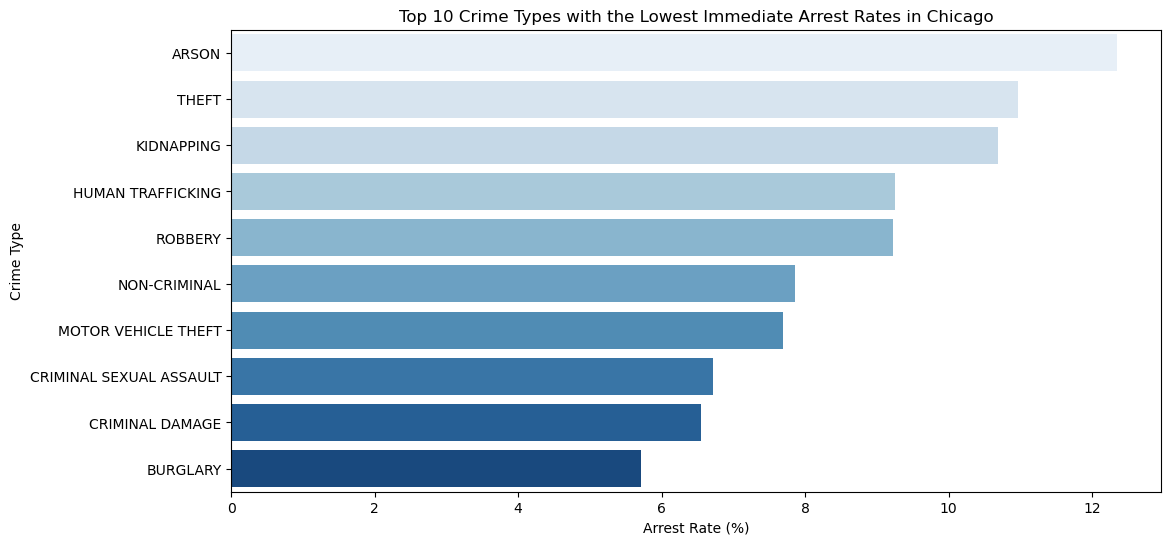

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_least_arrested.index, x=top_10_least_arrested.values * 100, palette="Blues", order=top_10_least_arrested.index)
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Crime Type")
plt.title("Top 10 Crime Types with the Lowest Immediate Arrest Rates in Chicago")
plt.show()

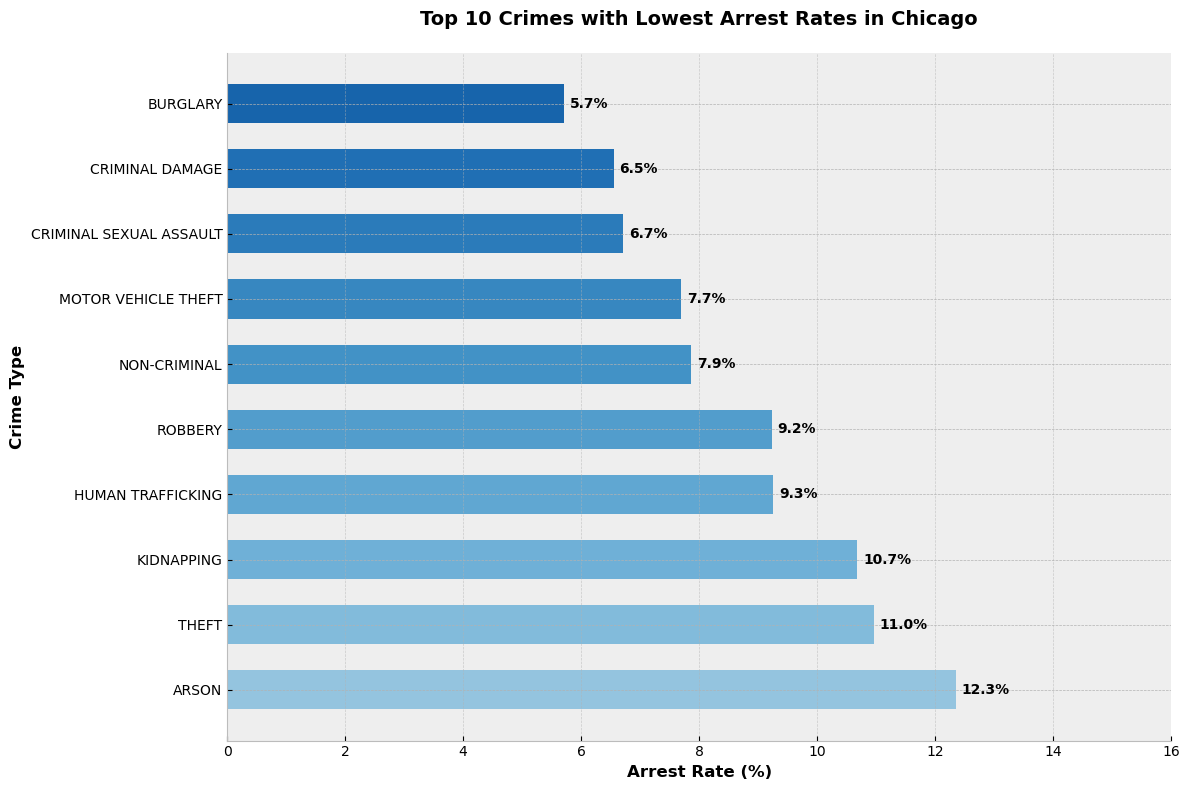

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(12, 8))

bars = plt.barh(y=top_10_least_arrested.index, 
                width=top_10_least_arrested.values * 100,
                color=plt.cm.Blues(np.linspace(0.4, 0.8, len(top_10_least_arrested))),
                height=0.6)

plt.title('Top 10 Crimes with Lowest Arrest Rates in Chicago', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xlabel('Arrest Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Crime Type', fontsize=12, fontweight='bold')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, 
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',
            ha='left',
            va='center',
            fontsize=10,
            fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6, axis='x')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.yticks(fontsize=10)
plt.xticks(range(0, int(max(top_10_least_arrested.values * 100)) + 5, 2),  # Smaller intervals for lower percentages
           fontsize=10)

plt.tight_layout()

plt.show()

In [121]:
print("\n Total Arrests:", total_arrests)


 Total Arrests: 2073933


In [122]:
print("\n Arrests Per Year:\n", arrests_per_year)


 Arrests Per Year:
 Year
2001    141207
2002    136670
2003    140472
2004    144276
2005    140253
2006    134699
2007    131721
2008    108173
2009    108864
2010    100488
2011     96213
2012     90581
2013     86469
2014     79314
2015     67522
2016     52857
2017     52283
2018     52952
2019     56113
2020     33815
2021     25132
2022     27303
2023     31631
2024     34925
dtype: int64


In [123]:
print("\n Top 10 Crimes with the Most Arrests:\n", top_10_most_arrested)


 Top 10 Crimes with the Most Arrests:
 Primary Type
DOMESTIC VIOLENCE                    1.000000
PROSTITUTION                         0.995790
NARCOTICS                            0.994129
GAMBLING                             0.993473
LIQUOR LAW VIOLATION                 0.991186
PUBLIC INDECENCY                     0.980861
CONCEALED CARRY LICENSE VIOLATION    0.966126
INTERFERENCE WITH PUBLIC OFFICER     0.918242
OBSCENITY                            0.763403
WEAPONS VIOLATION                    0.725011
Name: count, dtype: float64


In [139]:
print("\n Top 10 Crimes with the Least Arrests:\n", top_10_least_arrested)


 Top 10 Crimes with the Least Arrests:
 Primary Type
ARSON                      0.123450
THEFT                      0.109624
KIDNAPPING                 0.106828
HUMAN TRAFFICKING          0.092593
ROBBERY                    0.092290
NON-CRIMINAL               0.078652
MOTOR VEHICLE THEFT        0.076920
CRIMINAL SEXUAL ASSAULT    0.067110
CRIMINAL DAMAGE            0.065483
BURGLARY                   0.057141
Name: count, dtype: float64
